# Phân loại văn bản báo chí
Bài toán giúp phân loại văn bản vào lĩnh vực phù hợp
<br>
**Đầu vào:** Một văn bản báo trí. Tập các nhãn định trước.
<br>
**Đầu ra:** Nhãn của văn bản bản đó.
<br> Hiện tại sử dụng 11 nhãn đó là: chính trị, du lịch, giải trí, khoa học, kinh doanh, pháp luật, quân sự, sức khỏe, thể thao, văn hóa, khác

In [7]:
import pickle, io, sys
from sklearn.metrics import accuracy_score

In [44]:
eval_target = 'categorization/test.tsv'
model_file = "categorization/linear_sgd.pickle"

with io.open(model_file, "rb") as pickle_file:
    module_label, module_tfidf, module_classifier = pickle.load(pickle_file)

with io.open(eval_target, "r", encoding="utf-8") as eval_file:
    data = [line.split("\t") for line in eval_file.readlines()]
    labels, _, _, full_texts = zip(*data)
    features, labels = list(full_texts), list(labels)
    
processed_labels = module_label.transform(labels)
processed_features = module_tfidf.transform(features)
predictions = module_classifier.predict(processed_features)

print("Accuracy_score: ", accuracy_score(processed_labels, predictions))

Accuracy_score:  0.8976115208991922


Text(0.5, 1.0, 'Classification accuracy')

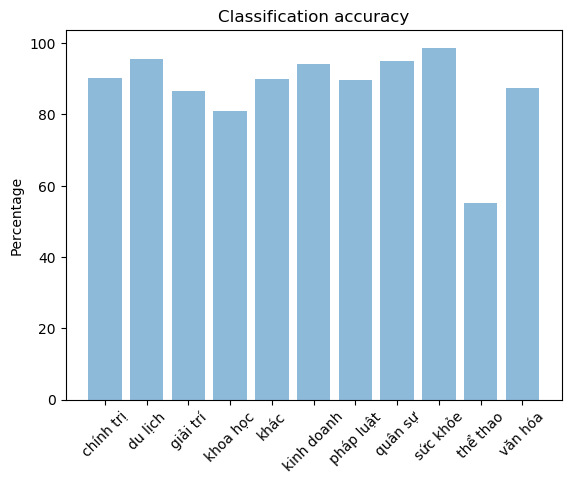

In [45]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = module_label.classes_
accurate = [0 for _ in objects]
total = [0 for _ in objects]
for pred, label in zip(predictions, processed_labels):
    total[label-1] += 1
    if(pred == label):
        accurate[label-1] += 1
accuracy = [float(a) / float(t) * 100.0 for a, t in zip(accurate, total)]
y_pos = np.arange(len(accuracy))

plt.bar(y_pos, accuracy, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=45)
plt.ylabel('Percentage')
plt.title('Classification accuracy')

# Thử một vài bài báo chí

In [68]:
import nltk
from nltk.tokenize import word_tokenize

test_docs = [
    "Barca đang có nhiều hơn 18 điểm so với Real - đội xếp thứ ba với 68 điểm sau 37 trận. Nếu thắng trên sân Eibar cuối tuần này, Barca sẽ kết thúc mùa giải với cách biệt chưa từng có: từ 18 đến 21 điểm. Trong lịch sử, Barca từng nhiều hơn 17 điểm so với Real ở mùa 1984-1985 và 2017-2018.",
    "Tập đoàn Công nghiệp Đóng tàu Vũ Xương Trung Quốc vừa nhận hợp đồng trị giá 23,5 triệu USD đóng một tàu hải cảnh, dự kiến hoạt động tại khu vực quần đảo Hoàng Sa thuộc chủ quyền của Việt Nam. Theo trang web của chính quyền tỉnh Hải Nam, tàu hải cảnh này sẽ có trọng tải 1.900 tấn, dài 102 m và có thể chở theo thủy thủ đoàn lên đến 50 người. Tàu có tốc độ hành trình 32 km/h, tốc độ đối đa 41 km/h, phạm vi hoạt động hơn 10.000 km. Giới quan sát nhận định dự án đóng con tàu này là một phần trong nỗ lực của Trung Quốc nhằm mở rộng sự hiện diện của lực lượng phi hải quân tại Biển Đông, phục vụ tham vọng độc chiếm vùng biển này bất chấp luật pháp quốc tế. Dự kiến đến năm 2021, cái gọi là chính quyền Tam Sa của Trung Quốc sẽ sở hữu khoảng 20 tàu hải cảnh. Tư lệnh hải quân Mỹ John Richardson trước đó cho biết lực lượng hải cảnh Trung Quốc gần đây thường xuyên gây khó khăn cho hoạt động tuần tra tự do hàng hải của Washington tại Biển Đông. Đô đốc Richardson cũng cảnh báo hải quân Mỹ sẽ đối xử với các tàu dân quân của Trung Quốc, gồm tàu hải cảnh và tàu đánh cá, như các tàu hải quân trong các vụ chạm mặt.",
    "Nghệ sĩ Hải Phượng chia sẻ trong những lần ngẫu hứng với đàn tranh, chị nghĩ ra những giai điệu khiến tâm hồn thư thái, thanh tịnh hơn. Được mẹ - Nhà giáo Ưu tú Phạm Thúy Hoan - khuyến khích, chị tập hợp những giai điệu đó thành các bản nhạc có chủ đề. Một album được ra đời với tên Sen - loài hoa biểu tượng trong Phật giáo. CD gồm năm nhạc phẩm: Sen, Xuân, Hạ, Thu, Đông. Hải Phượng phối hợp nhiều nhạc khí như đàn tranh, đàn bầu, sáo trúc, tỳ bà, đàn tứ... để chuyển tải những giai điệu mang đậm chất Việt với phong cách trầm lắng, nhẹ nhàng. Chị chọn sen làm chủ đề chính cho album để diễn tả sự trong lành, mạnh mẽ của một loài hoa trải qua bốn mùa, như vòng lặp sinh tử của mỗi người."
]
test_labels = [
    "thể thao",
    "quân sự",
    "giải trí"
]

In [69]:
tokenized_docs = [' '.join(word_tokenize(doc)) for doc in test_docs]
feature_docs = module_tfidf.transform(tokenized_docs)

test_predictions = module_label.inverse_transform(module_classifier.predict(feature_docs))

print ('Predictions: {}'.format(test_predictions))
print ('True labels: {}'.format(test_labels))

Predictions: ['thể thao' 'quân sự' 'giải trí']
True labels: ['thể thao', 'quân sự', 'giải trí']
